In [35]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt 
import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from PIL import Image
from numpy import asarray
import csv
from pathlib import Path
import cv2
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
import pickle

In [2]:
def trans_save_pic(pic_file_name):

    # Get the list of all files and directories
    path = f"C://Users//Yehia//brain tumor model//brain_tumor_dataset//{pic_file_name}"
    dir_list = os.listdir(path)
    for i in dir_list:
        img = cv2.imread(f'brain_tumor_dataset/{pic_file_name}/{i}', cv2.IMREAD_UNCHANGED)
        width = 180
        height = 218
        dim = (width, height)
        # resize image
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        filename = f'{pic_file_name}/{i}'
        # Using cv2.imwrite() method
        # Saving the image
        cv2.imwrite(filename, resized)

In [9]:
trans_save_pic("no")

In [4]:
def store_pics_df(file_name_df="yes"):
    #store pics as array
    pics=[]
    
    #store pics label
    pic_label=[]
    
    #read all files in the path 
    path = f"C://Users//Yehia//brain tumor model//{file_name_df}"
    dir_list_2 = os.listdir(path)
    
    #convert pics to array
    for i in dir_list_2:
        img = cv2.imread(f'{file_name_df}/{i}', cv2.IMREAD_COLOR)
        img_re_arr=img.reshape(1,117720)
        pics.append(img_re_arr)
        if file_name_df=="yes":
            pic_label.append(1)
        elif file_name_df=="no":
            pic_label.append(0)
        else:print(f"Can't Save label '{file_name_df}' only yes or no .")
            
   #store pics in DataFrame 
    label_data=pd.DataFrame()
    no_label_data=pd.DataFrame()
    for i in pics:
        data=pd.DataFrame(i)
        no_label_data=pd.concat([no_label_data, data])
    no_label_data["label"]=pic_label    
    label_data= no_label_data
    
    return label_data

In [10]:
label_data=store_pics_df("no")

In [11]:
all_data=pd.concat([all_data,label_data])

In [13]:
all_data

,0,1,2,3,4,5,6,7,8,9,...,117711,117712,117713,117714,117715,117716,117717,117718,117719,label
0,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,2,2,2,1
0,254,254,254,255,255,255,250,250,250,255,...,245,245,245,255,255,255,255,255,255,1
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
0,10,10,10,13,13,13,11,11,11,12,...,10,10,10,9,9,9,10,10,10,1
0,112,112,112,23,23,23,43,43,43,187,...,19,19,19,19,19,19,20,20,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,109,109,109,9,9,9,9,9,9,7,...,27,11,5,32,5,1,34,5,0,0
0,3,3,3,11,11,11,16,16,16,14,...,11,11,11,12,12,12,12,12,12,0
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,1,1,1,1,1,1,0
0,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,0


In [14]:
all_data["label"].value_counts(normalize=True)

1    0.611111
0    0.388889
Name: label, dtype: float64

In [15]:
label="label"
X=all_data.drop(columns=label)
y=all_data[label]

In [16]:
ros = RandomOverSampler(random_state=42)

In [17]:
X_over_sample,y_over_sample=ros.fit_resample(X, y)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X_over_sample/255,y_over_sample,test_size=0.1,random_state=42)

In [19]:
model=MLPClassifier()

In [20]:
model.fit(X_train,y_train)

C:\Users\Yehia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [21]:
model.score(X_train,y_train)

0.9963898916967509

In [22]:
y_pred=model.predict(X_train)

In [23]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       139
           1       0.99      1.00      1.00       138

    accuracy                           1.00       277
   macro avg       1.00      1.00      1.00       277
weighted avg       1.00      1.00      1.00       277



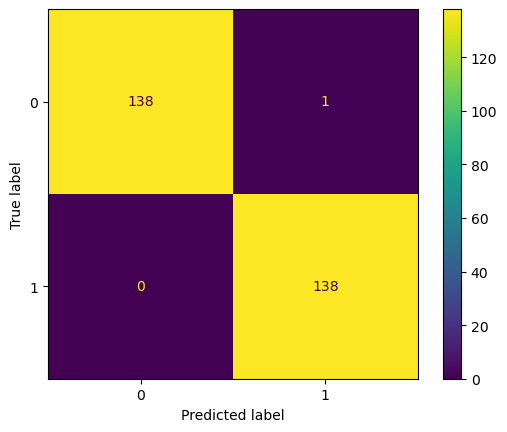

In [24]:
ConfusionMatrixDisplay.from_estimator(model,X_train,y_train)

In [25]:
model.score(X_test,y_test)

0.9354838709677419

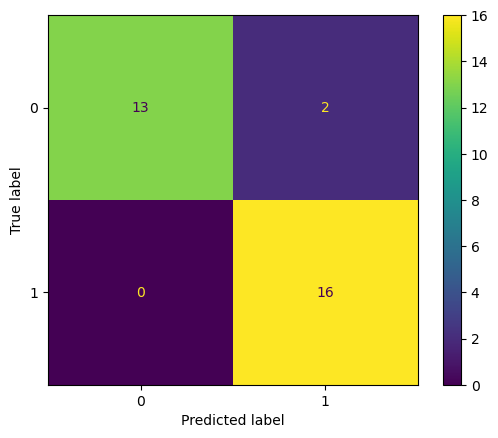

In [26]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [106]:
img = cv2.imread(f'loc.jpg', cv2.IMREAD_UNCHANGED)
width = 180
height = 218
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
filename = f'test_yes2.jpg'
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, resized)

True

In [107]:
test_pic=[]

In [108]:
img = cv2.imread(f'test_yes2.jpg', cv2.IMREAD_COLOR)
img_re_arr=img.reshape(1,117720)
test_pic.append(img_re_arr)

In [109]:
test_data=pd.DataFrame(test_pic[0])

In [110]:
test_data = test_data/255

In [111]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,117710,117711,117712,117713,117714,117715,117716,117717,117718,117719
0,0.439216,0.12549,0.121569,0.14902,0.0,0.0,0.019608,0.023529,0.007843,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
test=model.predict(test_data)

In [113]:
test[0]

0

In [36]:
pickle.dump(model, open('model.pkl', 'wb'))

In [37]:
model = pickle.load(open('model.pkl', 'rb'))